# Clasificaciones de imagenes con ResNet152V2

##BUILD ROBOCUP_2019 Dataset

###Dataset details
RoboCup Dataset contains 196195 images.

8 main parent categories that contain 180 children categories.

80% for train

20% for test


##Importar los paquetes

In [ ]:
from tensorflow import keras
import zipfile
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt


##ResNet152V2 for subclass

###LoadData

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


### Build model - ResNet152V2

In [ ]:
base_model = keras.applications.ResNet152V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(180, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


234545216/234545216 [==============================] - 7s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
Total params: 58,700,468
Trainable params: 368,820
Non-trainable params: 58,331,648
_________________________________________________________________


###Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])


Epoch 1/20
4908/4908 [==============================] - 1428s 287ms/step - loss: 5.0841 - accuracy: 0.1700 - top_5_accuracy: 0.4126 - precision: 0.2484 - val_loss: 3.9049 - val_accuracy: 0.2743 - val_top_5_accuracy: 0.5861 - val_precision: 0.3549
Epoch 2/20
4908/4908 [==============================] - 1402s 286ms/step - loss: 4.3866 - accuracy: 0.2525 - top_5_accuracy: 0.5527 - precision: 0.3223 - val_loss: 3.8589 - val_accuracy: 0.3029 - val_top_5_accuracy: 0.6214 - val_precision: 0.3779
Epoch 3/20
4908/4908 [==============================] - 1402s 286ms/step - loss: 4.1457 - accuracy: 0.2839 - top_5_accuracy: 0.5941 - precision: 0.3545 - val_loss: 3.7563 - val_accuracy: 0.3269 - val_top_5_accuracy: 0.6457 - val_precision: 0.4038
Epoch 4/20
4908/4908 [==============================] - 1405s 286ms/step - loss: 3.9981 - accuracy: 0.3034 - top_5_accuracy: 0.6176 - precision: 0.3732 - val_loss: 3.6960 - val_accuracy: 0.3326 - val_top_5_accuracy: 0.6514 - val_precision: 0.4091
Epoch 5/20
4

###print results

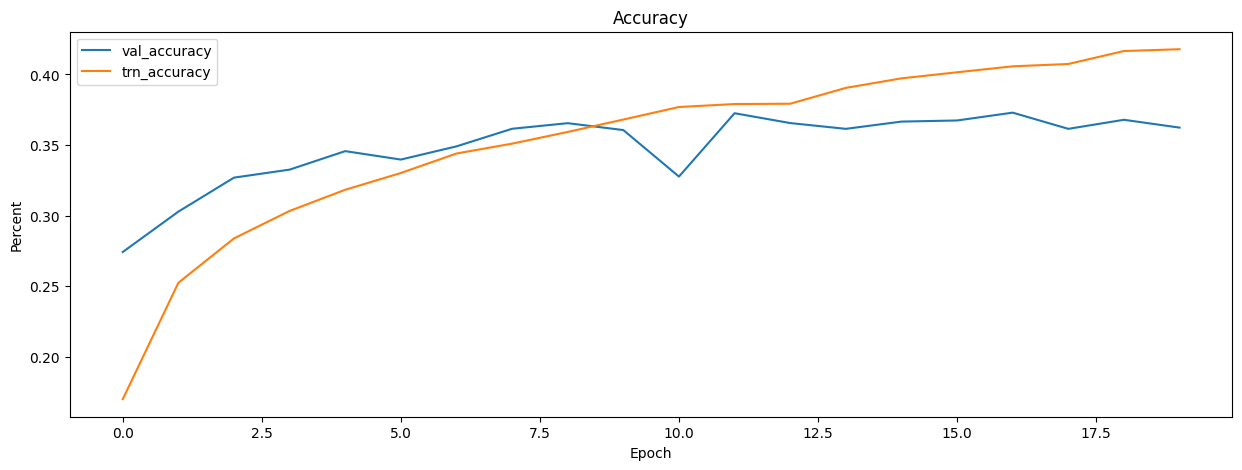

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

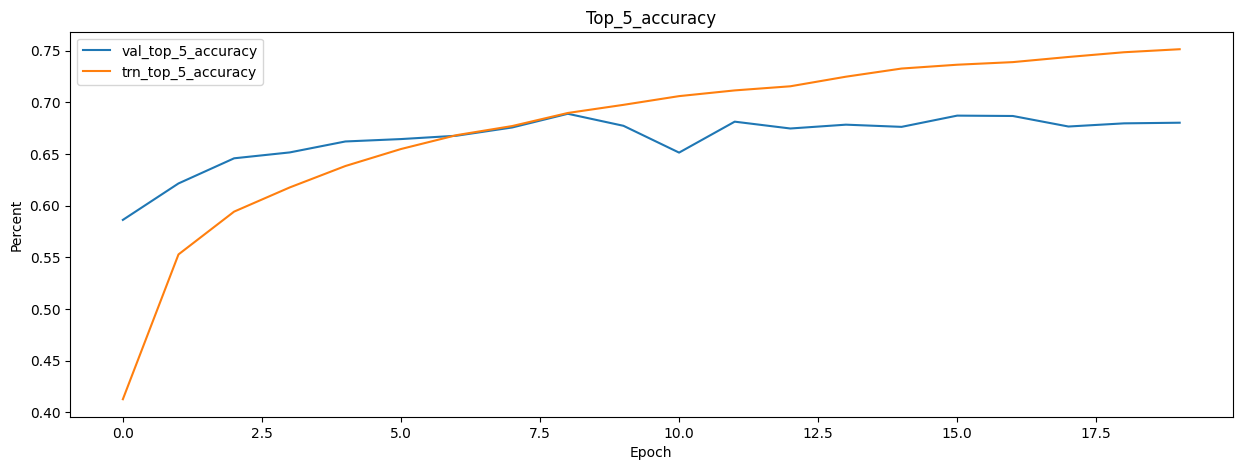

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

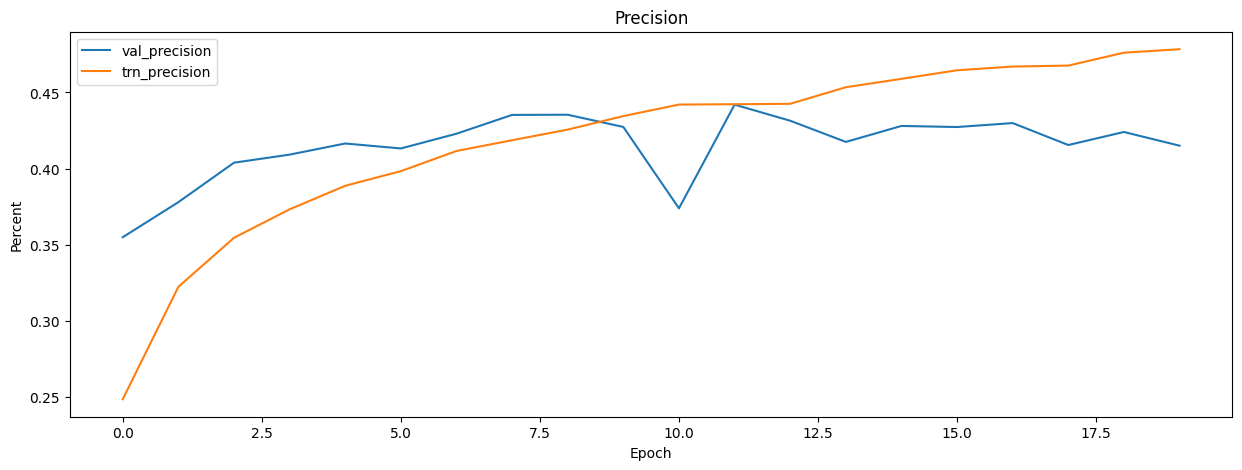

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model')

## ResNet152V2 for Superclass

###Load super class data

In [ ]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

### Create the model
 whose weights are generated in the previous step, when training with the fine classes.

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model')
# Agregar una nueva capa de salida personalizada
new_output_layer = keras.layers.Dense(NUM_CLASSES, activation='softmax', name='superClass')(model.layers[-1].output)

# Crear un nuevo modelo con la capa de salida personalizada
model = keras.models.Model(inputs=model.input, outputs=new_output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                                 
Total params: 58,701,916
Trainable params: 370,268
Non-trainable params: 58,331,648
_________________________________________

### Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])


Epoch 1/20
4859/4859 [==============================] - 1413s 289ms/step - loss: 1.4426 - accuracy: 0.6447 - top_5_accuracy: 0.9290 - precision: 0.8069 - val_loss: 1.3217 - val_accuracy: 0.6164 - val_top_5_accuracy: 0.9106 - val_precision: 0.7394
Epoch 2/20
4859/4859 [==============================] - 1408s 290ms/step - loss: 1.0473 - accuracy: 0.7142 - top_5_accuracy: 0.9467 - precision: 0.7761 - val_loss: 1.2638 - val_accuracy: 0.6180 - val_top_5_accuracy: 0.9113 - val_precision: 0.6946
Epoch 3/20
4859/4859 [==============================] - 1410s 290ms/step - loss: 0.9730 - accuracy: 0.7254 - top_5_accuracy: 0.9508 - precision: 0.7799 - val_loss: 1.2359 - val_accuracy: 0.6274 - val_top_5_accuracy: 0.9227 - val_precision: 0.7019
Epoch 4/20
4859/4859 [==============================] - 1410s 290ms/step - loss: 0.9390 - accuracy: 0.7327 - top_5_accuracy: 0.9545 - precision: 0.7954 - val_loss: 1.2960 - val_accuracy: 0.5911 - val_top_5_accuracy: 0.9255 - val_precision: 0.7157
Epoch 5/20
4

###print results

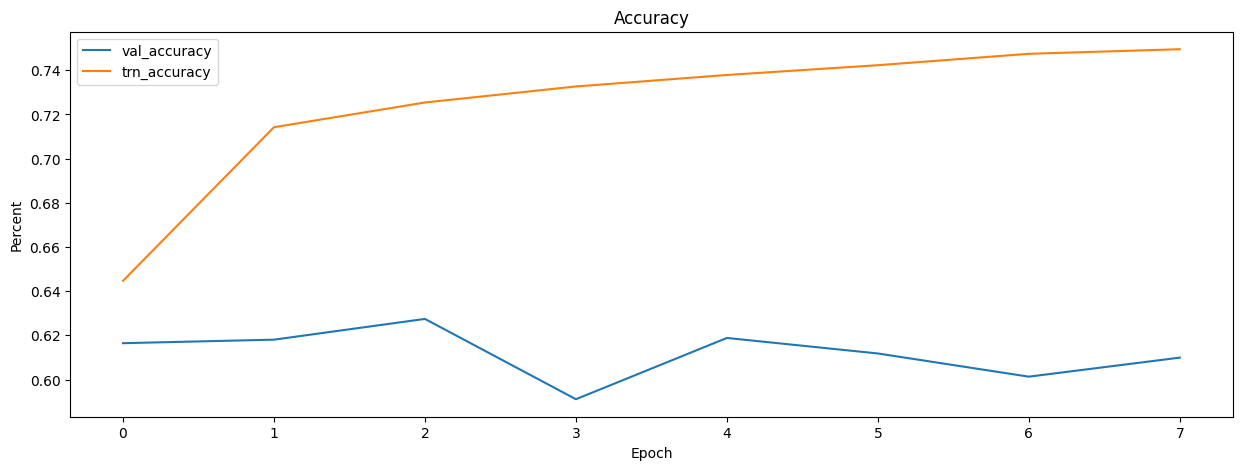

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

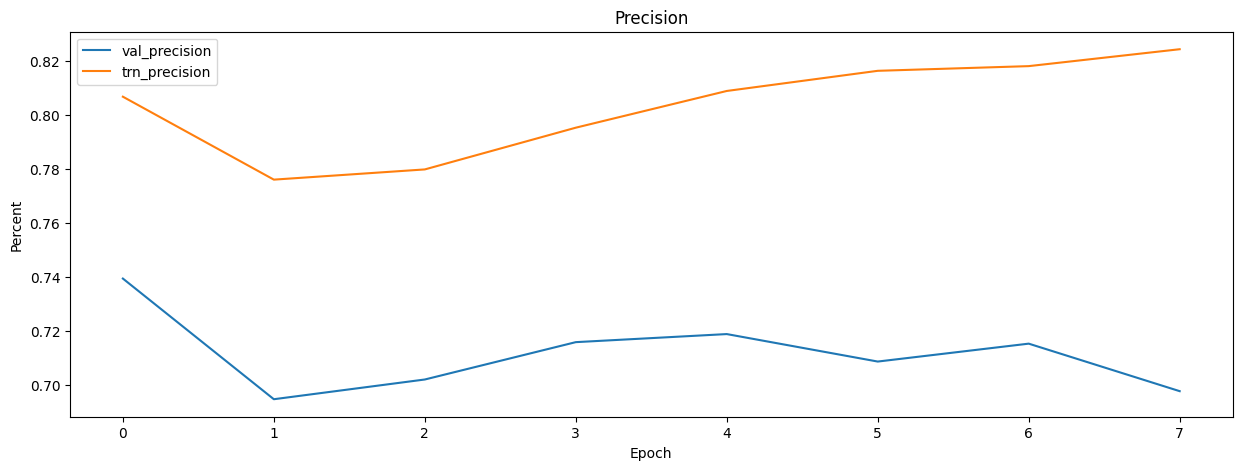

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model_superClass')

##Fine-tuning subClass

###Load data

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = True, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = True, seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model')
model.trainable=True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
Total params: 58,700,468
Trainable params: 58,556,724
Non-trainable params: 143,744
_________________________________________________________________


###Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=25, validation_data=valid_batches, callbacks=[callback])


Epoch 1/25
4908/4908 [==============================] - 793s 140ms/step - loss: 1.7620 - accuracy: 0.5345 - top_5_accuracy: 0.8240 - precision: 0.7389 - val_loss: 2.0779 - val_accuracy: 0.4974 - val_top_5_accuracy: 0.7834 - val_precision: 0.6872
Epoch 2/25
4908/4908 [==============================] - 685s 139ms/step - loss: 1.3289 - accuracy: 0.6368 - top_5_accuracy: 0.8846 - precision: 0.8030 - val_loss: 2.0498 - val_accuracy: 0.5115 - val_top_5_accuracy: 0.7916 - val_precision: 0.6868
Epoch 3/25
4908/4908 [==============================] - 686s 140ms/step - loss: 0.9781 - accuracy: 0.7251 - top_5_accuracy: 0.9288 - precision: 0.8526 - val_loss: 2.1691 - val_accuracy: 0.5143 - val_top_5_accuracy: 0.7926 - val_precision: 0.6518
Epoch 4/25
4908/4908 [==============================] - 684s 139ms/step - loss: 0.7020 - accuracy: 0.7992 - top_5_accuracy: 0.9585 - precision: 0.8892 - val_loss: 2.3037 - val_accuracy: 0.5190 - val_top_5_accuracy: 0.7931 - val_precision: 0.6290
Epoch 5/25
4908/

###print results

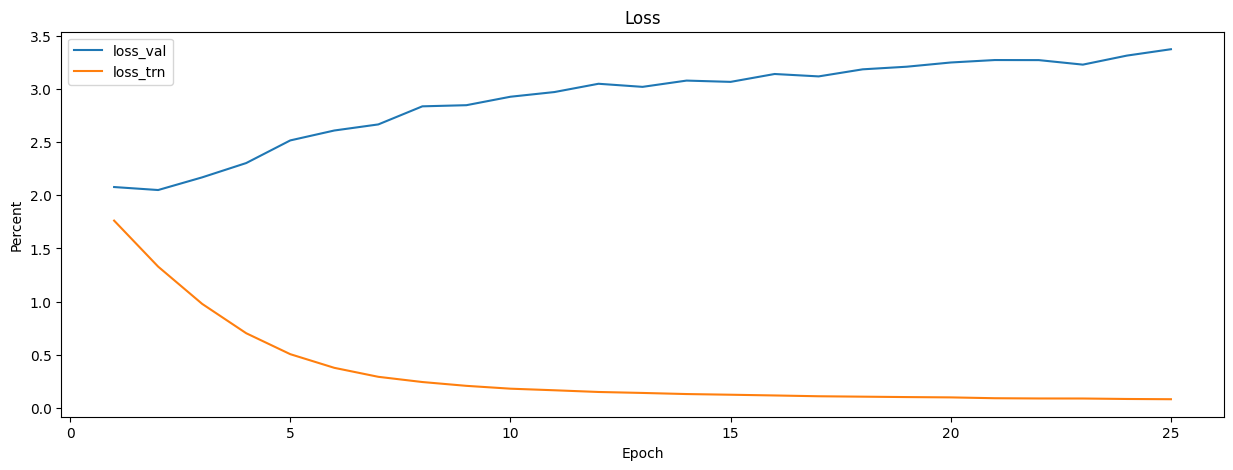

In [1]:
import matplotlib.pyplot as plt

loss = [1.7620, 1.3289, 0.9781, 0.7020, 0.5049, 0.3764, 0.2918, 0.2427, 0.2068, 0.1801, 0.1651, 0.1491, 0.1400, 0.1296, 0.1232, 0.1163, 0.1088, 0.1049, 0.1011, 0.0981, 0.0903, 0.0880, 0.0876, 0.0832, 0.0809]
val_loss = [2.0779, 2.0498, 2.1691, 2.3037, 2.5167, 2.6100, 2.6673, 2.8375, 2.8482, 2.9278, 2.9720, 3.0499, 3.0208, 3.0798, 3.0677, 3.1418, 3.1192, 3.1858, 3.2104, 3.2501, 3.2732, 3.2725, 3.2300, 3.3150, 3.3750]


# Crear gráfico de pérdida
plt.figure(figsize=(15,5))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss, label='loss_val')
plt.plot(epochs, loss, label='loss_trn')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

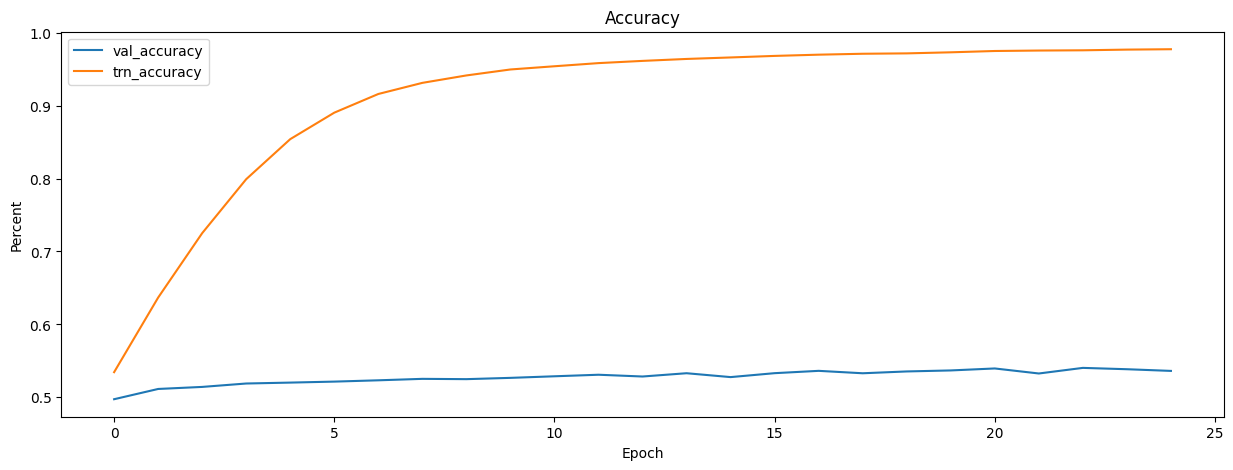

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

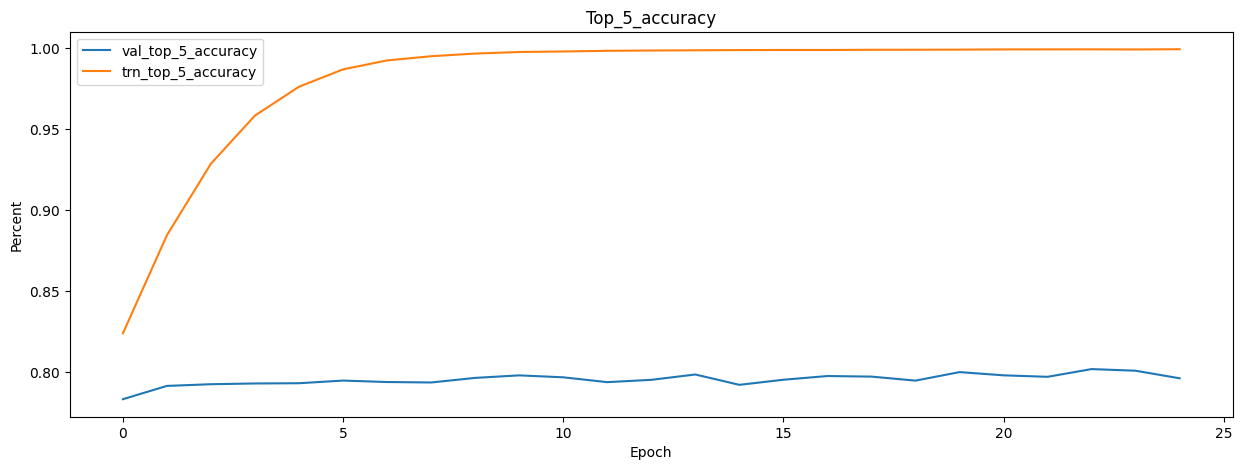

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

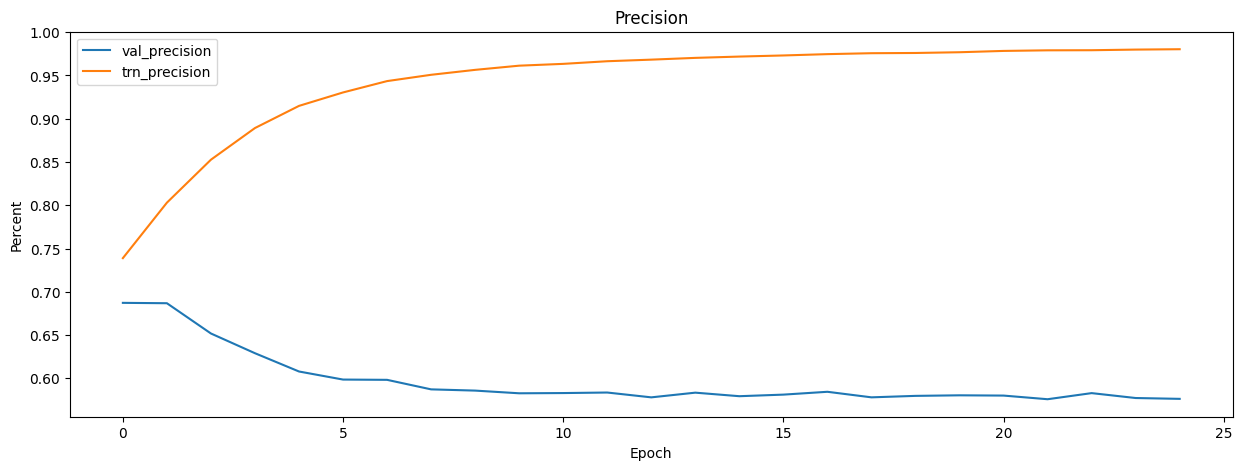

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model_fineTuning')

##Fine-tuning superClass

###Load data

In [ ]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model_superClass')
model.trainable=True
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                                 
Total params: 58,701,916
Trainable params: 58,558,172
Non-trainable params: 143,744
_________________________________________

###Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=15, validation_data=valid_batches, callbacks=[callback])


Epoch 1/15
4859/4859 [==============================] - 780s 140ms/step - loss: 0.8603 - accuracy: 0.7389 - top_5_accuracy: 0.9667 - precision: 0.8289 - val_loss: 1.1049 - val_accuracy: 0.6434 - val_top_5_accuracy: 0.9512 - val_precision: 0.7456
Epoch 2/15
4859/4859 [==============================] - 675s 139ms/step - loss: 0.7355 - accuracy: 0.7849 - top_5_accuracy: 0.9740 - precision: 0.8668 - val_loss: 1.1229 - val_accuracy: 0.6431 - val_top_5_accuracy: 0.9473 - val_precision: 0.7373
Epoch 3/15
4859/4859 [==============================] - 675s 139ms/step - loss: 0.6522 - accuracy: 0.8175 - top_5_accuracy: 0.9781 - precision: 0.8876 - val_loss: 1.0635 - val_accuracy: 0.6658 - val_top_5_accuracy: 0.9523 - val_precision: 0.7493
Epoch 4/15
4859/4859 [==============================] - 675s 139ms/step - loss: 0.5866 - accuracy: 0.8422 - top_5_accuracy: 0.9813 - precision: 0.9027 - val_loss: 1.0709 - val_accuracy: 0.6602 - val_top_5_accuracy: 0.9525 - val_precision: 0.7416
Epoch 5/15
4859/

###print results

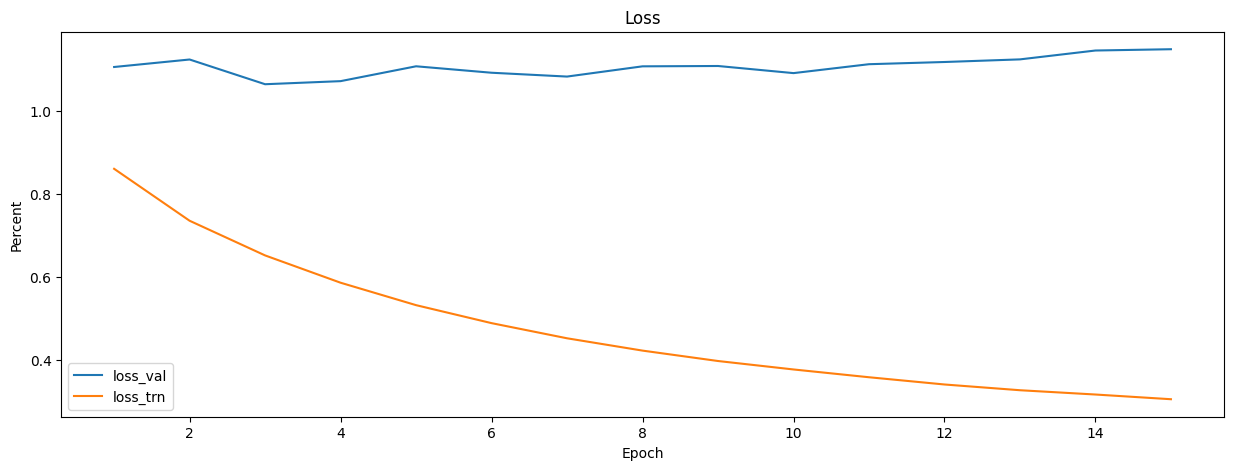

In [2]:

import matplotlib.pyplot as plt

loss = [0.8603, 0.7355, 0.6522, 0.5866, 0.5327, 0.4895, 0.4531, 0.4235, 0.3985, 0.3782, 0.3595, 0.3421, 0.3283, 0.3180, 0.3067]
val_loss = [1.1049, 1.1229, 1.0635, 1.0709, 1.1066, 1.0911, 1.0819, 1.1065, 1.1073, 1.0902, 1.1116, 1.1169, 1.1232, 1.1445, 1.1476]

# Crear gráfico de pérdida
plt.figure(figsize=(15,5))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss, label='loss_val')
plt.plot(epochs, loss, label='loss_trn')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

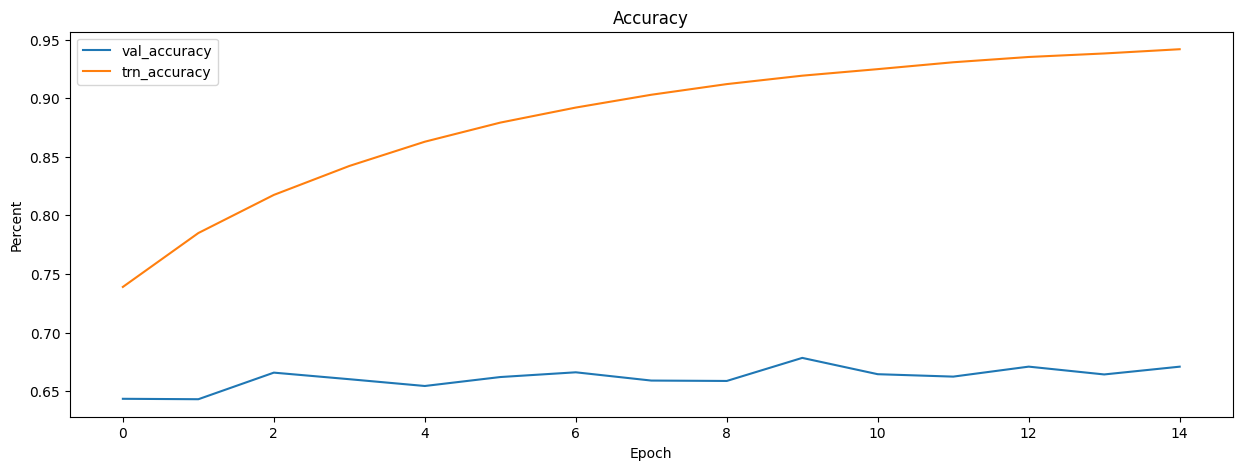

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

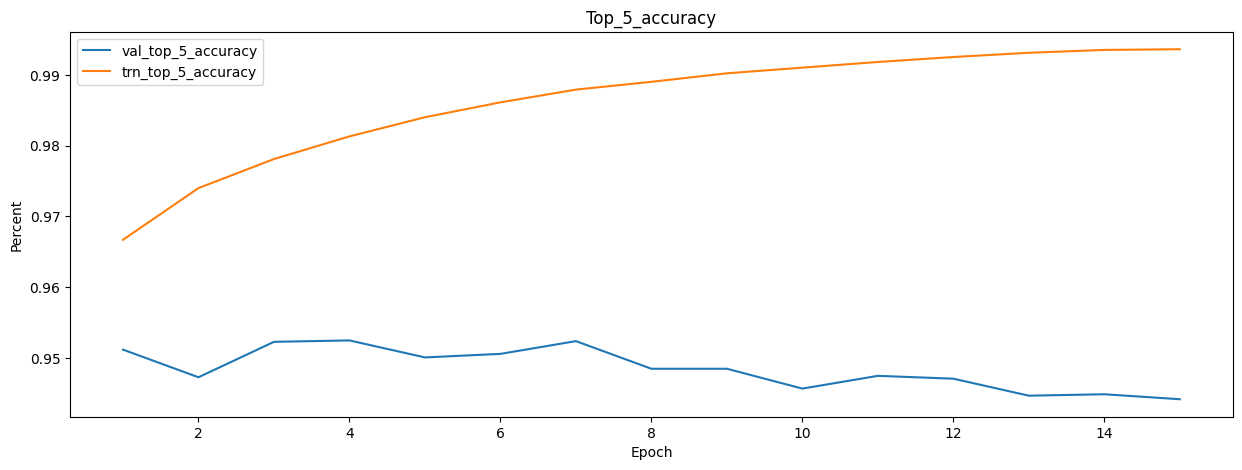

In [3]:
top_5_accuracy = [0.9667, 0.9740, 0.9781, 0.9813, 0.9840, 0.9861, 0.9879, 0.9890, 0.9902, 0.9910, 0.9918, 0.9925, 0.9931, 0.9935, 0.9936]
val_top_5_accuracy = [0.9512, 0.9473, 0.9523, 0.9525, 0.9501, 0.9506, 0.9524, 0.9485, 0.9485, 0.9457, 0.9475, 0.9471, 0.9447, 0.9449, 0.9442]


# Crear gráfico de pérdida
plt.figure(figsize=(15,5))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_top_5_accuracy, label='val_top_5_accuracy')
plt.plot(epochs, top_5_accuracy, label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

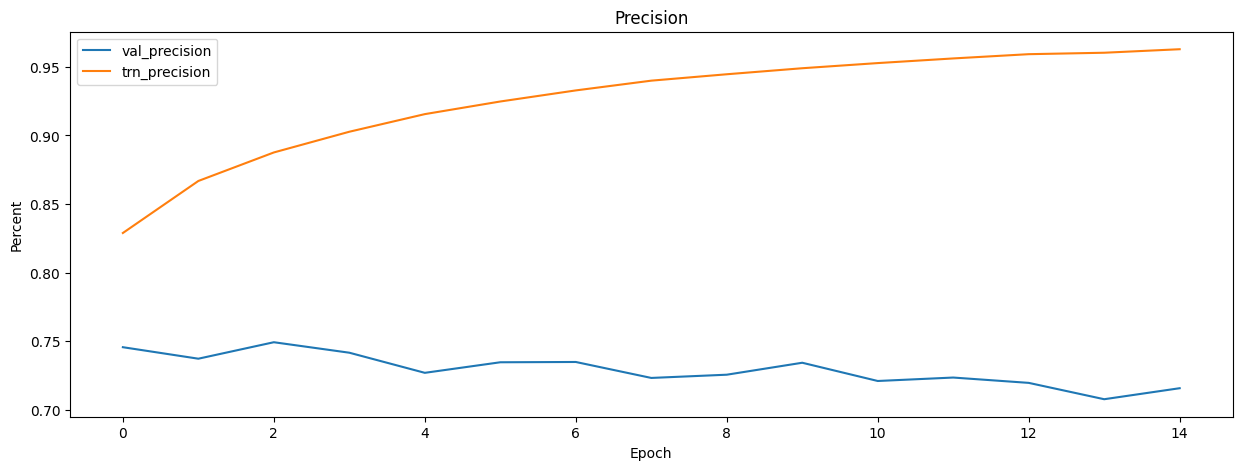

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model_superClass_fineTuning')

In [ ]:
from google.colab import runtime
runtime.unassign

<function google.colab.runtime.unassign()>

##Confusion Matrix

###Importar los paquetes

In [ ]:
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import confusion_matrix
import zipfile
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Montar drive y definir el tamaño


In [ ]:
drive.mount('/content/drive')
BATCH_SIZE = 32
IMG_SIZE = 224

Mounted at /content/drive


###Clases padres

In [ ]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


<ipython-input-15-856f5404ba3a>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


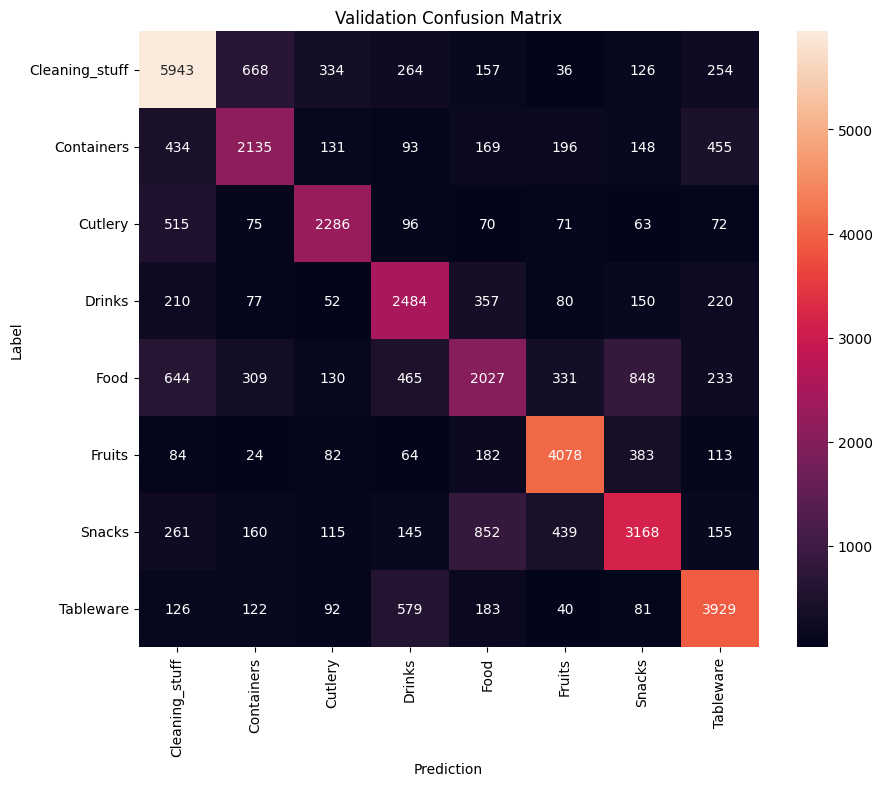

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model_superClass_fineTuning')

class_names = ['Cleaning_stuff', 'Containers', 'Cutlery', 'Drinks', 'Food', 'Fruits', 'Snacks', 'Tableware']

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="g"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Validation Confusion Matrix")
plt.show()

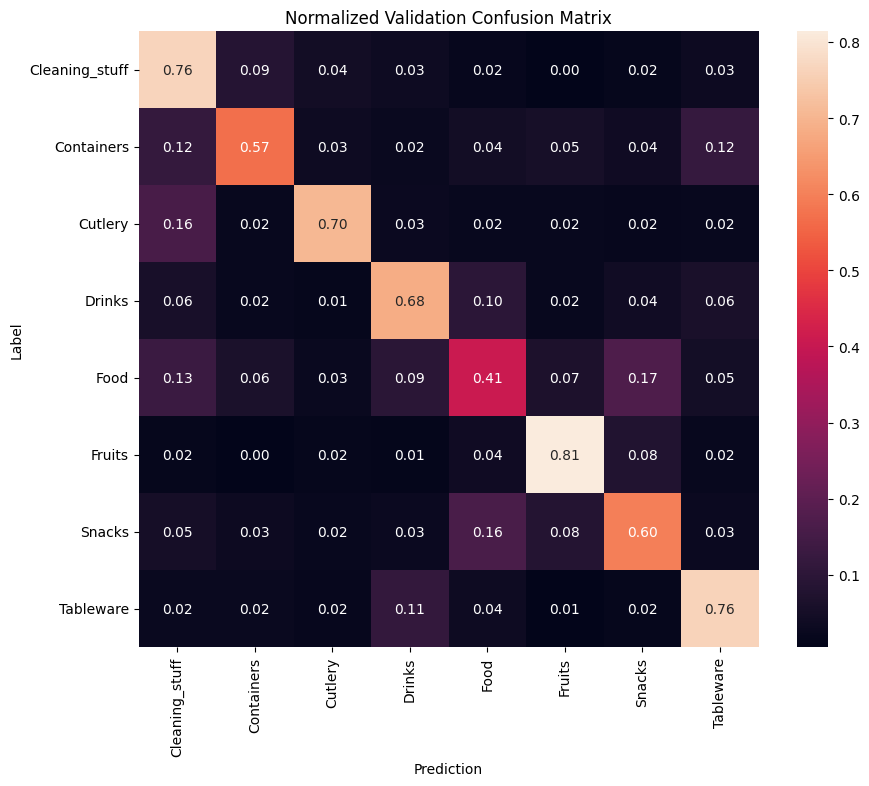

In [ ]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt=".2f"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()

###Clases hijos

In [ ]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/ResNet152V2Model_fineTuning')

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

<ipython-input-9-479b6c77c33d>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


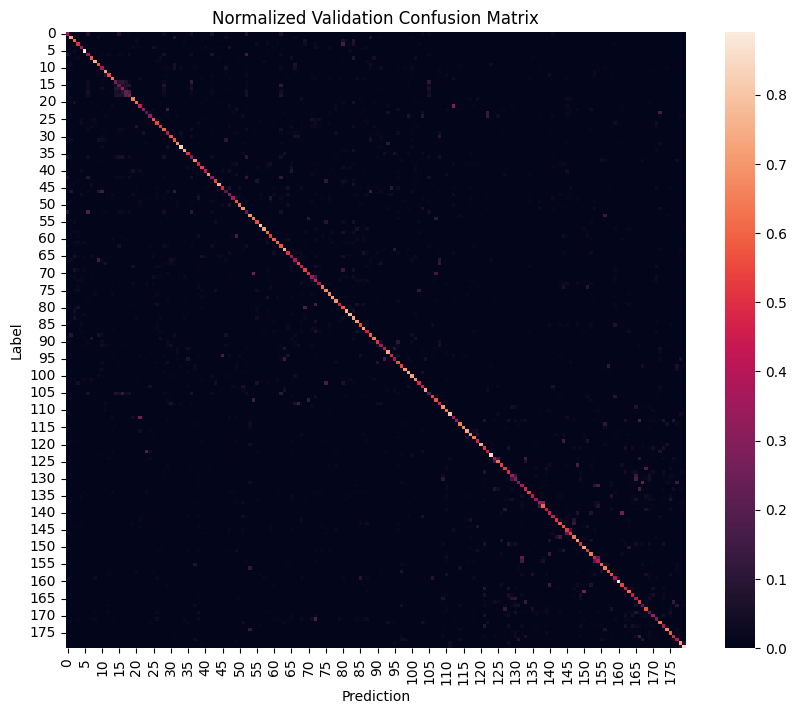

In [ ]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()